In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing and Preparing data

In [2]:
data = pd.read_csv("trainlinearregression.csv")
data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


# Scaling

In [3]:

def scale(data):
    y = data["SalePrice"]
    m, n = data.shape
    dataScaled = data.drop('SalePrice', axis=1)

   
    for i in range(n-1):  # Iterate over columns
        series = dataScaled.iloc[:,i]
        series_min = series.min()
        series_max = series.max()
        dataScaled[i] = (series - series_min) / (series_max - series_min)

    return dataScaled, y

# Training

In [4]:

def fit(X, Y):
    m, n = X.shape
    
    # initialization
    w = np.zeros(n)
    b = 0
    alpha = 0.001
    epochs = 1000 #no. of iterations
    
    Cost = np.zeros(epochs)

    for i in range(epochs):
        Y_pred = X @ w + b
        
        D_b = (1/m) * np.sum(Y_pred - Y)
        D_w = (1/m) * X.T @ (Y_pred - Y)

        cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2))
        Cost[i]= cost
        
        w = w - alpha * D_w
        b = b - alpha * D_b
    return w, b, Cost


C:\Users\arush\AppData\Local\Temp\ipykernel_15172\503509366.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - alpha * D_b


OverallQual    NaN
GrLivArea      NaN
GarageCars     NaN
GarageArea     NaN
TotalBsmtSF    NaN
1stFlrSF       NaN
FullBath       NaN
TotRmsAbvGrd   NaN
YearBuilt      NaN
YearRemodAdd   NaN
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
dtype: float64 nan


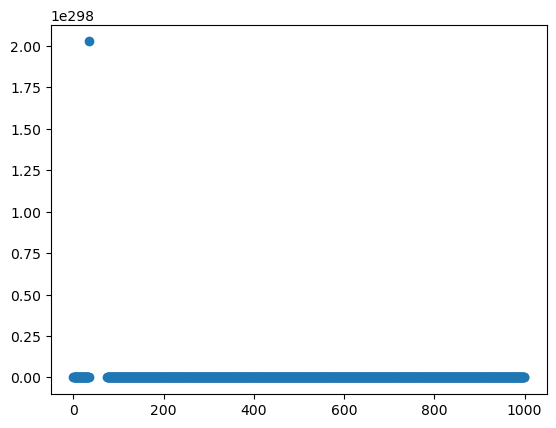

In [5]:
x_train, y_train = scale(data)
w, b, cost=fit(x_train, y_train)
print(w,b)
plt.scatter(np.linspace(0,len(cost)-1,len(cost)),cost)#linspace will form array frm 0 to len of cost-1 with len(cost) nos.
plt.show()
